### Geolocation Integration(Identify The Location from Digital signals)
#### What We Do Here:
* Convert IP addresses to integer format using custom module
* Merge Fraud_Data.csv with IpAddress_to_Country.csv using range-based lookup using custom module
* Analyze fraud patterns by country using custom module

In [1]:
# import Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sys 
sys.path.append("..")

#### Load The Dataset

In [2]:
from src.geo_location import IPToCountryMapper
fraud_df=pd.read_csv("../data/raw/Fraud_Data.csv")
ip_df=pd.read_csv("../data/raw/IpAddress_to_Country.csv")

In [3]:
# Intialize IpToCountry Mapper
Ip_mapper=IPToCountryMapper(ip_df)

#### Convert IP column to Int using custom Module

In [4]:
# convert IP Column to int
fraud_df=Ip_mapper.convert_ip_to_int(fraud_df)
fraud_df.dtypes

user_id            int64
signup_time       object
purchase_time     object
purchase_value     int64
device_id         object
source            object
browser           object
sex               object
age                int64
ip_address         int64
class              int64
dtype: object

#### Map IPs To Country

In [5]:
# Map Ips to country
fraud_df=Ip_mapper.map_ip_to_country(fraud_df)

In [8]:
fraud_df.country # check the new added country column

0                 Japan
1         United States
2         United States
3               unknown
4         United States
              ...      
151107    United States
151108      Netherlands
151109            Japan
151110    United States
151111          unknown
Name: country, Length: 151112, dtype: object

In [7]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   user_id         151112 non-null  int64 
 1   signup_time     151112 non-null  object
 2   purchase_time   151112 non-null  object
 3   purchase_value  151112 non-null  int64 
 4   device_id       151112 non-null  object
 5   source          151112 non-null  object
 6   browser         151112 non-null  object
 7   sex             151112 non-null  object
 8   age             151112 non-null  int64 
 9   ip_address      151112 non-null  int64 
 10  class           151112 non-null  int64 
 11  country         151112 non-null  object
dtypes: int64(5), object(7)
memory usage: 13.8+ MB


In [13]:
# save the data set with country
fraud_df.to_csv("../data/processed/fraud_cleaned.csv",index=False)

#### Fraud by Country Analysis

In [9]:
country_fraud=fraud_df.groupby('country')['class'].mean().sort_values(ascending=False)
country_fraud.head()

country
Turkmenistan             1.000000
Namibia                  0.434783
Sri Lanka                0.419355
Luxembourg               0.388889
Virgin Islands (U.S.)    0.333333
Name: class, dtype: float64

In [10]:
fraud_df.country.value_counts()

country
United States     58049
unknown           21966
China             12038
Japan              7306
United Kingdom     4490
                  ...  
Yemen                 1
San Marino            1
Burundi               1
Nauru                 1
Guadeloupe            1
Name: count, Length: 182, dtype: int64

##### Plot the Top 10 Country Fraud

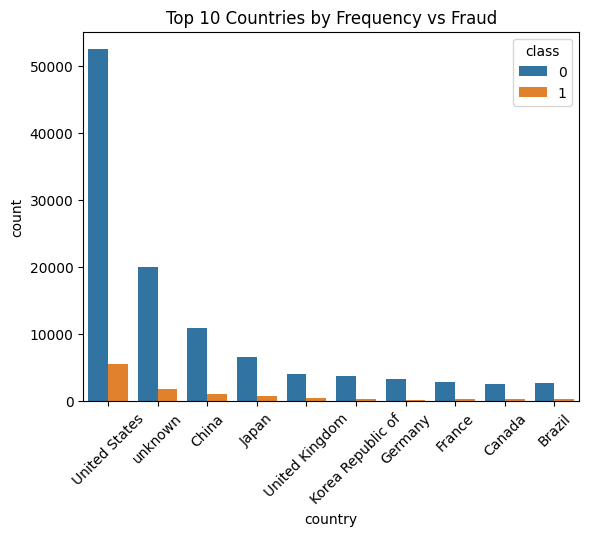

In [11]:
import seaborn as sns
# Get top 10 countries by frequency
top_countries = fraud_df['country'].value_counts().head(10).index

# Filter dataframe to only include these countries
filtered_df = fraud_df[fraud_df['country'].isin(top_countries)]

sns.countplot(x='country', hue='class', data=filtered_df, order=top_countries)
plt.title("Top 10 Countries by Frequency vs Fraud")
plt.xticks(rotation=45)
plt.show()

#### Insights
 * Absolute fraud counts highest in US: Most fraudulent transactions occur in the US, but this correlates with overall transaction volume

 * Need to calculate fraud RATES: We cannot determine risk from absolute counts alone - need to calculate fraud percentage per country